In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# 实践

In [ ]:
# pca 降维然后使用k means 来展现

# 1.构造模拟高维数据：100维，分成3类
X, y_true = make_blobs(n_samples=300, n_features=100, centers=3, random_state=42)


In [ ]:

# 2️⃣ PCA 降维：从100维 ➜ 降到2维
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3️⃣ 用 KMeans 聚类：现在是在 2D 空间里聚类，更稳定！
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)

# 4️⃣ 可视化聚类效果
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('PCA + KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# 看 sklearn 怎么提取这些矩阵 & 成分

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9]
])
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
# 用 sklearn 的 PCA 提取信息
pca_sklearn = PCA()
pca_sklearn.fit(X_centered)

# 拿出和我们手算一样的内容
components_sklearn = pca_sklearn.components_        # 主成分方向（特征向量）
explained_var_sklearn = pca_sklearn.explained_variance_  # 特征值
explained_ratio_sklearn = pca_sklearn.explained_variance_ratio_  # 方差占比
mean_sklearn = pca_sklearn.mean_                    # 均值（应为0，因我们手动中心化过）

# 打包展示
pd.DataFrame({
    "主成分": ["PC1", "PC2"],
    "特征值": explained_var_sklearn,
    "方差贡献率": explained_ratio_sklearn,
    "方向 X": components_sklearn[0],
    "方向 Y": components_sklearn[1]
}), mean_sklearn

(   主成分       特征值    方差贡献率      方向 X      方向 Y
 0  PC1  2.414643  0.96844  0.681415  0.731898
 1  PC2  0.078690  0.03156  0.731898 -0.681415,
 array([ 0.00000000e+00, -7.40148683e-17]))

3D → 2D // 3D → 1D

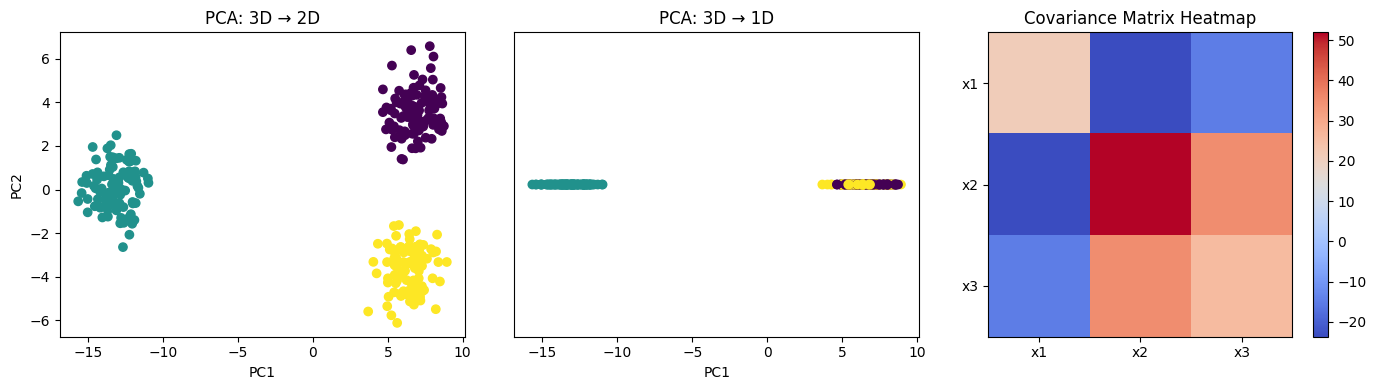

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# 生成模拟 3D 数据
X, y = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)

# 应用 PCA 将 3D 降维到 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# 应用 PCA 将 3D 降维到 1D
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X)

# 协方差矩阵
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered.T)

# 可视化：原始数据 3D → PCA 2D
plt.figure(figsize=(14, 4))

# 可视化 2D 降维结果
plt.subplot(1, 3, 1)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis')
plt.title("PCA: 3D → 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")

# 可视化 1D 降维结果
plt.subplot(1, 3, 2)
plt.scatter(X_pca_1d, np.zeros_like(X_pca_1d), c=y, cmap='viridis')
plt.title("PCA: 3D → 1D")
plt.xlabel("PC1")
plt.yticks([])

# 可视化协方差矩阵热力图
plt.subplot(1, 3, 3)
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Covariance Matrix Heatmap")
plt.colorbar()
plt.xticks([0,1,2], ['x1','x2','x3'])
plt.yticks([0,1,2], ['x1','x2','x3'])

plt.tight_layout()
plt.show()


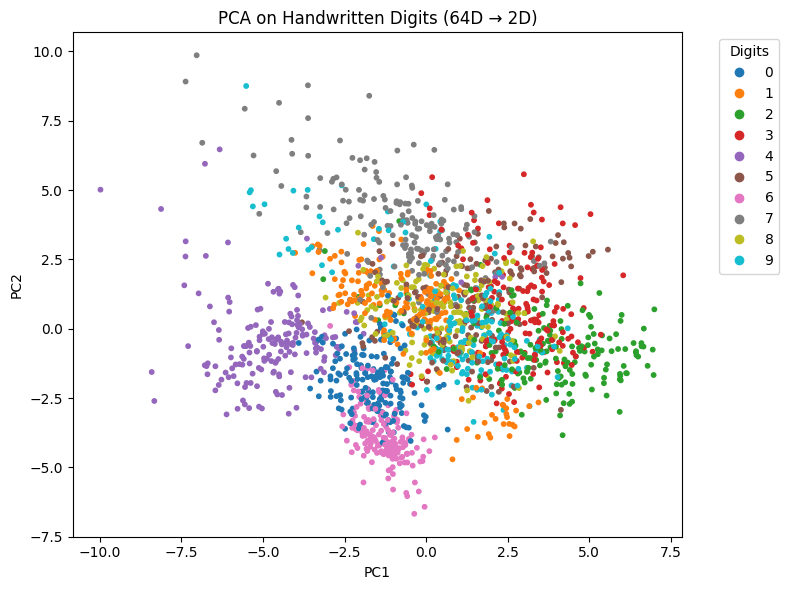

In [3]:
# 手写数字数据（MNIST）来跑一次 PCA+可视化
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# 加载手写数字数据（8x8像素，64维）
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# 标准化数据（PCA前的好习惯）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_digits)

# PCA 降维到 2D
pca_digits = PCA(n_components=2)
X_digits_pca = pca_digits.fit_transform(X_scaled)

# 可视化降维后的结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=y_digits, cmap='tab10', s=10)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Handwritten Digits (64D → 2D)")
plt.tight_layout()
plt.show()


<ipython-input-4-d647d45a5eca>:39: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-d647d45a5eca>:39: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-d647d45a5eca>:39: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-d647d45a5eca>:39: UserWarning: Glyph 20960 (\N{CJK UNIFIED IDEOGRAPH-51E0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-d647d45a5eca>:39: UserWarning: Glyph 20309 (\N{CJK UNIFIED IDEOGRAPH-4F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-d647d45a5eca>:39: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(

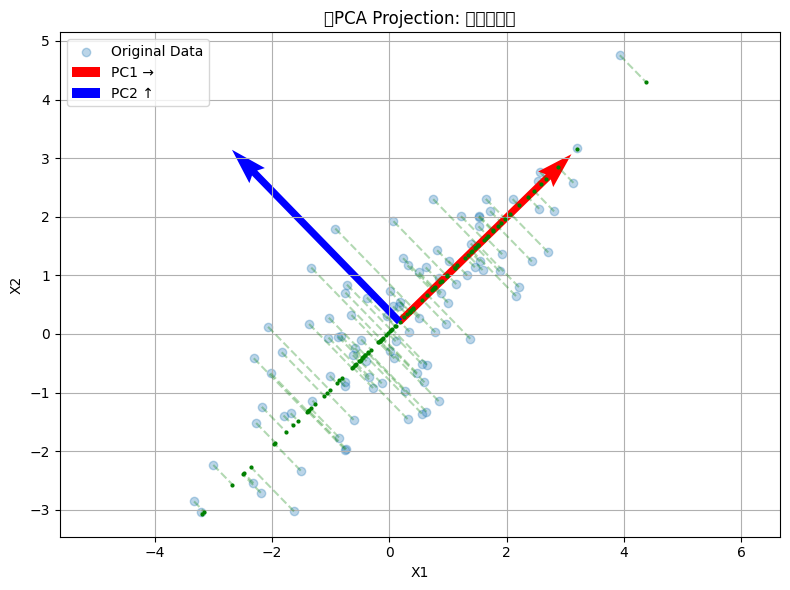

In [4]:
import matplotlib.pyplot as plt

# 模拟二维数据点，围绕一条斜线分布
np.random.seed(42)
n_points = 100
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[3, 2.5], [2.5, 3]],
    size=n_points
)

# 使用 PCA 提取主成分方向
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
components = pca.components_  # 两个主成分向量
mean = pca.mean_  # 数据中心

# 投影到第一个主成分（1D）
X_proj = (X - mean) @ components[0].reshape(-1, 1)

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label='Original Data')
plt.quiver(*mean, *components[0], scale=3, color='r', label='PC1 →', width=0.01)
plt.quiver(*mean, *components[1], scale=3, color='b', label='PC2 ↑', width=0.01)

# 画投影点和连接线
for i in range(n_points):
    proj_point = mean + X_proj[i] * components[0]
    plt.plot([X[i, 0], proj_point[0]], [X[i, 1], proj_point[1]], 'g--', alpha=0.3)
    plt.plot(proj_point[0], proj_point[1], 'go', markersize=2)

plt.title("✨PCA Projection: 投影几何图")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


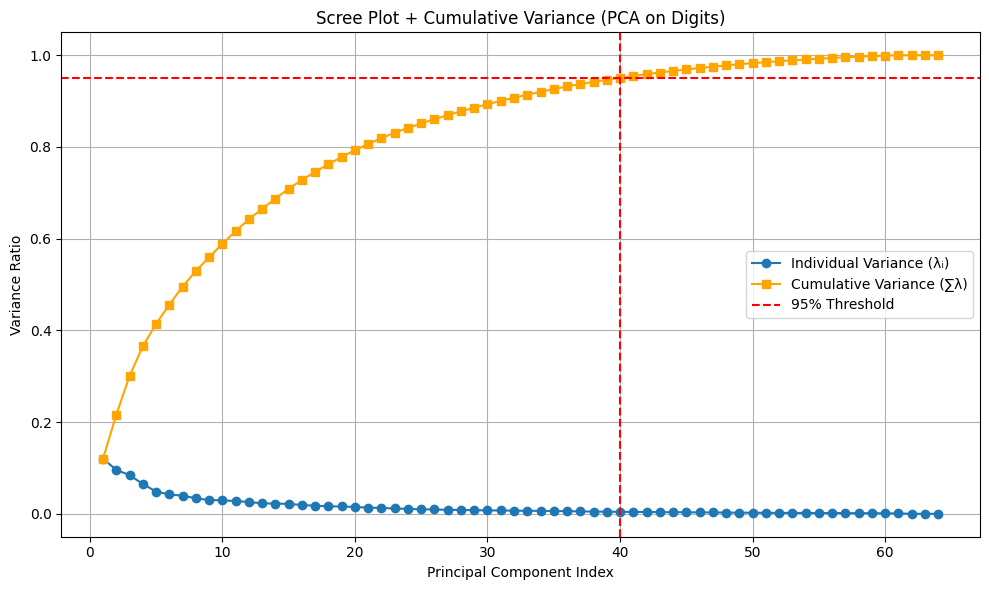

In [5]:
# 计算每个主成分的解释方差比例（explained variance ratio）
pca_full = PCA(n_components=64)
pca_full.fit(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 绘制 Scree Plot 和 累计贡献率图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 65), explained_variance_ratio, marker='o', label='Individual Variance (λᵢ)')
plt.plot(range(1, 65), cumulative_variance_ratio, marker='s', label='Cumulative Variance (∑λ)', color='orange')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axvline(x=np.argmax(cumulative_variance_ratio >= 0.95) + 1, color='r', linestyle='--')

plt.xlabel('Principal Component Index')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot + Cumulative Variance (PCA on Digits)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
